# Evaluating the Model on Test Set

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/wdsinfer/FINAL

/content/drive/MyDrive/wdsinfer/FINAL


In [ ]:
!pip install qt


ERROR: Could not find a version that satisfies the requirement qt (from versions: none)
ERROR: No matching distribution found for qt


In [ ]:
!pip install pyqt

ERROR: Could not find a version that satisfies the requirement pyqt (from versions: none)
ERROR: No matching distribution found for pyqt


In [ ]:
!python inference.py --video video_machinegun.mp4

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Inference time: 0.9920
Inference speed: 1.01 FPS
{'boxes': tensor([], device='cuda:0', size=(0, 4)), 'labels': tensor([], device='cuda:0', dtype=torch.int64), 'scores': tensor([], device='cuda:0')}
qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.10/dist-packages/cv2/qt/plu

In [ ]:
df = pd.read_csv("pred.csv")

In [ ]:
df.head()

,pred,actual,iou
0,2,2,0.737381
1,1,1,0.818909
2,2,2,0.858386
3,1,1,0.917713
4,2,2,0.937152


In [ ]:
def evaluate_predictions(df, iou_threshold=0.5):
    # True Positives
    true_positives = df[df['iou'] >= iou_threshold]

    # Precision
    precision = len(true_positives) / len(df[df['pred'] > 0])

    # Recall
    total_actual_positives = len(df[df['actual'] > 0])
    recall = len(true_positives) / total_actual_positives

    # F1-Score
    if precision + recall == 0:
        f1_score = 0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)

    # Mean IoU for True Positives
    mean_iou = true_positives['iou'].mean()

    return precision, recall, f1_score, mean_iou

# Calculate metrics
precision, recall, f1_score, mean_iou = evaluate_predictions(df, 0.5)
print(f"Precision: ", precision)
print(f"Recall: ", recall)
print(f"F1-score: ", f1_score)
print(f"mean_iou: ", mean_iou)

Precision:  0.9361202442461249
Recall:  0.935680751173709
F1-score:  0.9359004461141113
mean_iou:  0.8829250711773845


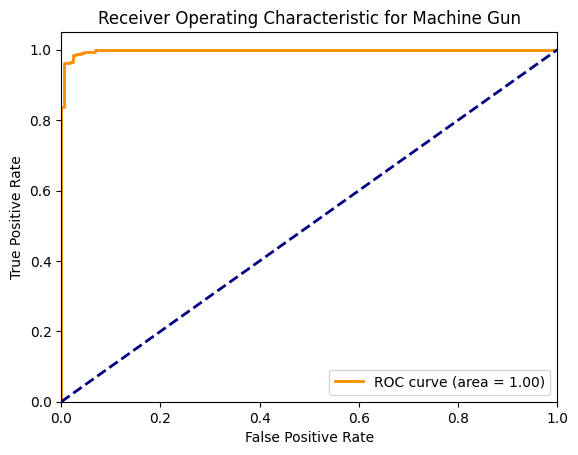

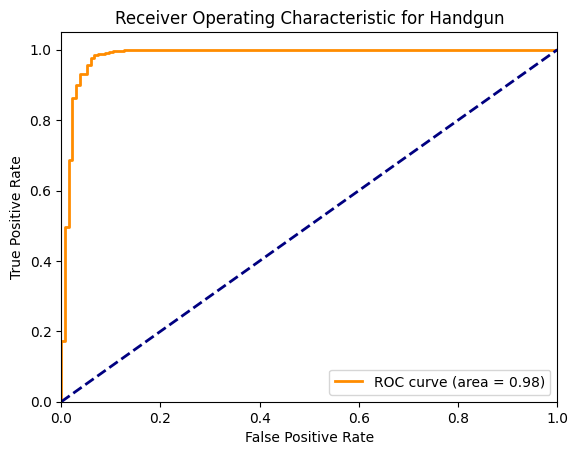

In [ ]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

iou_threshold = 0.5
df['binary_outcome'] = (df['iou'] >= iou_threshold) & (df['pred'] == df['actual'])

classes = {1: "Machine Gun", 2: "Handgun"}
for class_id, class_name in classes.items():
    class_mask = df['actual'] == class_id
    if class_mask.any():
        fpr, tpr, thresholds = roc_curve(df.loc[class_mask, 'binary_outcome'], df.loc[class_mask, 'iou'])
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic for {class_name}')
        plt.legend(loc="lower right")
        plt.show()


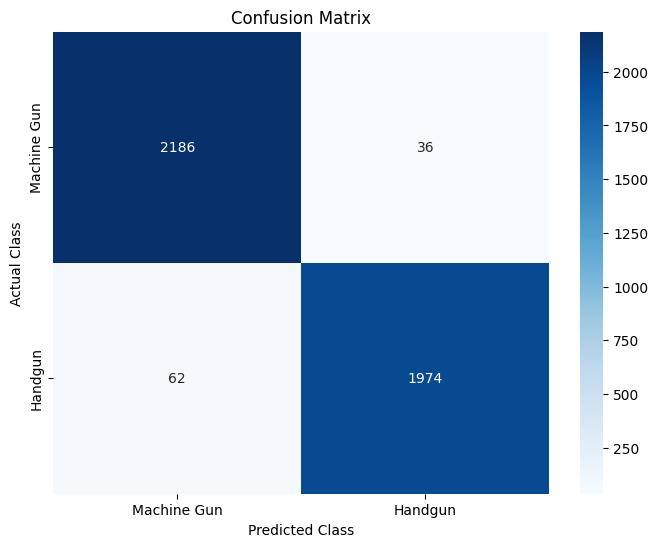

In [ ]:
conf_matrix = confusion_matrix(df['actual'], df['pred'], labels=[1, 2])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues',
            xticklabels=["Machine Gun", "Handgun"], yticklabels=["Machine Gun", "Handgun"])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

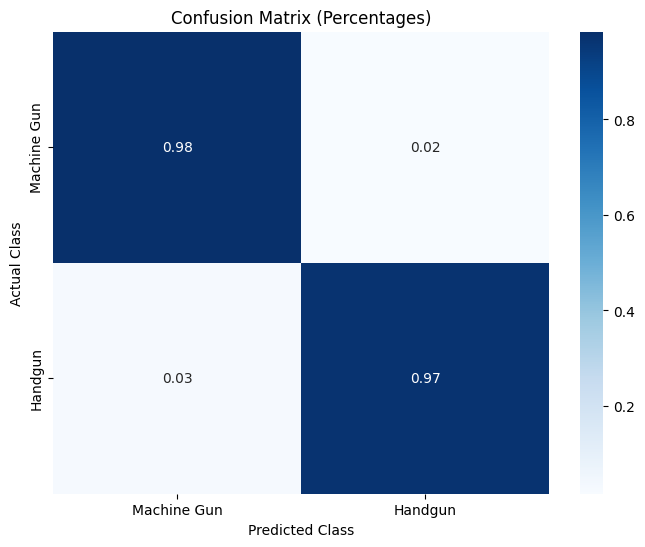

In [2]:
# Confusion matrix values
confusion_matrix = np.array([[2186, 36], [62, 1974]])

# Calculate percentages
confusion_matrix_percent = confusion_matrix / confusion_matrix.sum(axis=1, keepdims=True)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_matrix_percent, annot=True, fmt=".2f", cmap="Blues", cbar=True, xticklabels=['Machine Gun', 'Handgun'], yticklabels=['Machine Gun', 'Handgun'])

plt.title('Confusion Matrix (Percentages)')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()
